## Column Descriptions
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

Algorithm :
1. Sample a test set, put in aside, and never look at it( or you can to this after data preprocessing)
2. Explore the Data 
		- Pelajari setiap attribute dan relasi nya masing-masing pada satu sama lain
		- Binvariate Analysis
		- Multivariate Analysis
		- Cek Korelasi with Pearson

3. Data Preprocessing/Cleaning 
			- Jika ada missing value, fill missing value dengan mean atau median dari variabel tersebut
Feature Engineering steps by :
			- Cek Korelasi untuk mengetahui mana feature yang penting terhadap target variabel.
			- Feature Selection Dropping useless attributes, Dropping ['SleepTime','MentalHealth','Race']
		  - Fixed outliers pada setiap attribute, Fix or remove outliers (done with NeighborCleaningRule undersampling tech nique)
		  - if data is imbalanced, fix it with undersampling
			- Handling Categorical, dengan merubah data pada feature yang categorical menjadi numerical, karena machine learning model yang digunakan hanya menerima numerical data as input.
			- Lakukan Normalization dengan menggunakan StandardScaler
		

4. Choose 2 More models aside Logistic Regression for handling imbalanced data.
		- use Weighted Logistic Regression without resampling
		- use other models after resampling or using smote technique
		- Boosting
		- NaiveBayes/Random Forest

5. Evaluate the Model
		- Evaluate the model using ROC/AUC precision recall and confusion matrix
		- check whether its overfitting or not by comparing test with training result

## 1. Import Dataset and Libraries

### 1.1 Import Libraries

In [2]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
np.random.seed(42)

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt # Import matplotlib for data visualisation
# import seaborn as sns # Statistical data visualization
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots


### 1.2 Import Datasets

In [3]:
df = pd.read_csv('data/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### 1.3 Encode AgeCategory feature

In [3]:
# AgeCategory is an object, so we turn it into a float type, by taking the mean of  the age range
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [4]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

> Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.



#### Categorical Data

In [6]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

#### Numerical Data

In [5]:
numerical_df = df[['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']]
numerical_df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,319795.000000,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [8]:
fig = make_subplots(rows=3, cols=2 , subplot_titles=('BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime'), row_heights=[3,1,1],)

trace0 = go.Histogram(x=numerical_df['BMI'], name='Body Mass Index')
trace1 = go.Histogram(x=numerical_df['PhysicalHealth'],name='Days')
trace2 = go.Histogram(x=numerical_df['MentalHealth'], name='Days')
trace3 = go.Histogram(x=numerical_df['AgeCategory']
                     ,name='Age')
trace4 = go.Histogram(x=numerical_df['SleepTime']
                      , name='24 Hours')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)

fig.update_layout(height=1200, width=1500, title_text="Numerical Data Subplots")

fig.show()

Output hidden; open in https://colab.research.google.com to view.

### 2.2 Bivariate Analysis
> Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association


#### Plot Categorical Features vs Target

In [6]:
class_0_df = df[ df['HeartDisease']=='No' ]
class_1_df = df[ df['HeartDisease']=="Yes" ]
class_1_df["Smoking"].value_counts()

Yes    16037
No     11336
Name: Smoking, dtype: int64

In [10]:
fig = make_subplots(
    rows=6, cols=2, subplot_titles=("Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer')
)

smoking0 = go.Histogram(x=class_0_df['Smoking'], name='No')
smoking1 = go.Histogram(x=class_1_df['Smoking'], name='Yes')
alcohol0 = go.Histogram(x=class_0_df['AlcoholDrinking'], name='No')
alcohol1 = go.Histogram(x=class_1_df['AlcoholDrinking'], name='Yes')
stroke0 = go.Histogram(x=class_0_df['Stroke'], name='No')
stroke1 = go.Histogram(x=class_1_df['Stroke'], name='Yes')
diffwalk0 = go.Histogram(x=class_0_df['DiffWalking'], name='No')
diffwalk1 = go.Histogram(x=class_1_df['DiffWalking'], name='Yes')
sex0 = go.Histogram(x=class_0_df['Sex'], name='No')
sex1 = go.Histogram(x=class_1_df['Sex'], name='Yes')
race0 = go.Histogram(x=class_0_df['Race'], name='No')
race1 = go.Histogram(x=class_1_df['Race'], name='Yes')
diabetic0 = go.Histogram(x=class_0_df['Diabetic'], name='No')
diabetic1 = go.Histogram(x=class_1_df['Diabetic'], name='Yes')
physical0 = go.Histogram(x=class_0_df['PhysicalActivity'], name='No')
physical1 = go.Histogram(x=class_1_df['PhysicalActivity'], name='Yes')
GenHealth0 = go.Histogram(x=class_0_df['GenHealth'], name='No')
GenHealth1 = go.Histogram(x=class_1_df['GenHealth'], name='Yes')
Asthma0 = go.Histogram(x=class_0_df['Asthma'], name='No')
Asthma1 = go.Histogram(x=class_1_df['Asthma'], name='Yes')
kidney0 = go.Histogram(x=class_0_df['KidneyDisease'], name='No')
kidney1 = go.Histogram(x=class_1_df['KidneyDisease'], name='Yes')
skin0 = go.Histogram(x=class_0_df['SkinCancer'], name='No')
skin1 = go.Histogram(x=class_1_df['SkinCancer'], name='Yes')


fig.append_trace(smoking0, 1, 1)
fig.append_trace(smoking1, 1, 1)
fig.append_trace(alcohol0, 1, 2)
fig.append_trace(alcohol1, 1, 2)
fig.append_trace(stroke0, 2, 1)
fig.append_trace(stroke1, 2, 1)
fig.append_trace(diffwalk0, 2, 2)
fig.append_trace(diffwalk1, 2, 2)
fig.append_trace(sex0, 3, 1)
fig.append_trace(sex1, 3, 1)
fig.append_trace(race0, 3, 2)
fig.append_trace(race1, 3, 2)
fig.append_trace(diabetic0, 4, 1)
fig.append_trace(diabetic1, 4, 1)
fig.append_trace(physical0, 4, 2)
fig.append_trace(physical1, 4, 2)
fig.append_trace(GenHealth0, 5, 1)
fig.append_trace(GenHealth1, 5, 1)
fig.append_trace(Asthma0, 5, 2)
fig.append_trace(Asthma1, 5, 2)
fig.append_trace(kidney0, 6, 1)
fig.append_trace(kidney1, 6, 1)
fig.append_trace(skin0, 6, 2)
fig.append_trace(skin1, 6, 2)

# The two histograms are drawn on top of another
fig.update_layout(height=2400, width=1800, title_text="Categorical Vs Heart Disease Subplots",barmode='group')
fig.update_traces(opacity=0.9)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

#### Plot Numerical Features vs Target 

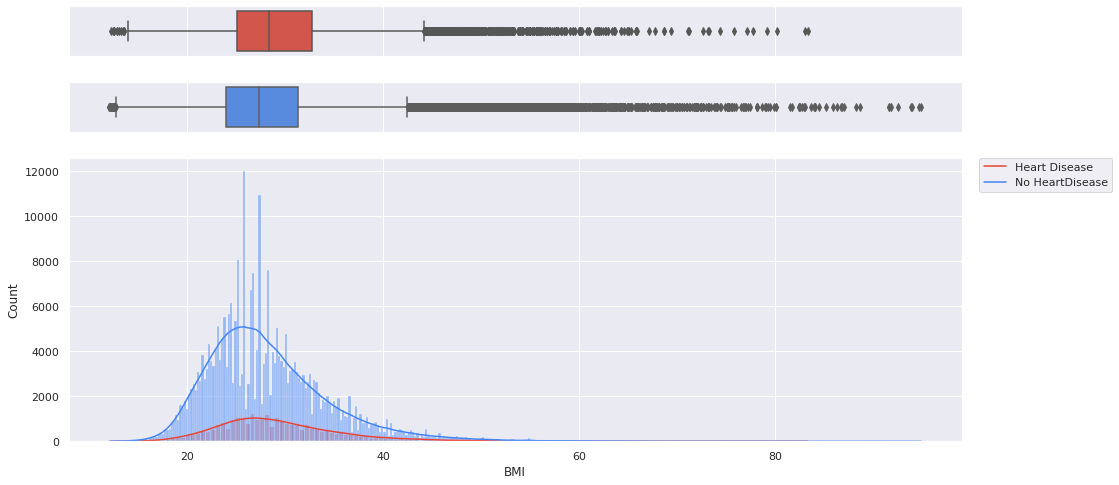

In [11]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

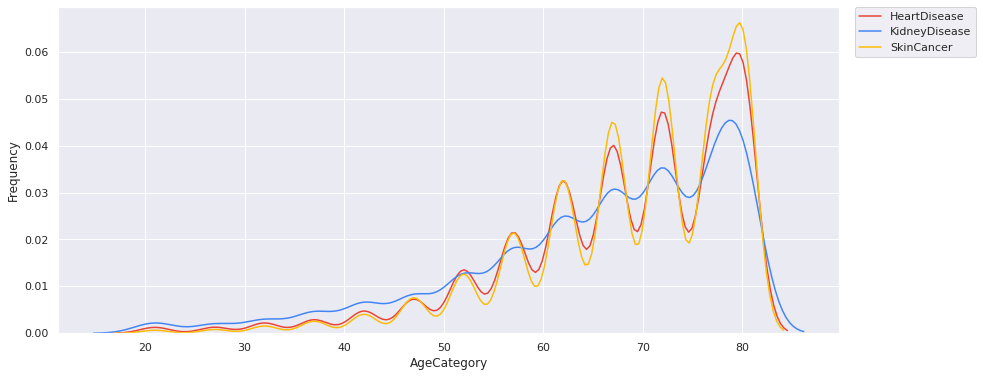

In [12]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()


> Sebagian besar memilik penyakit jantung, kanker kulit dan penyakit ginjal adalah orang-orang lanjut usia.

### 2.3 Turn Categorical Data into Numerical Data


In [5]:
categorical_df = df[[ "HeartDisease","Smoking","AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer']]

heart_df = df.copy(deep=True)
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,62.0,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,37.0,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,47.0,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,27.0,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# use LabelEncoder to encode Categorical Variable
for label in categorical_df[0:]:
  heart_df[label]= label_encoder.fit_transform(heart_df[label])

heart_df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,5,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,5,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,5,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,5,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,5,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,3,2,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,3,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,3,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27.0,3,0,0,Good,12.0,0,0,0


In [7]:
# Encode GenHealth ordinal type into a numerical type with a relationship rank from Poor(0) - Excellent(4)
encode_GenHealth = {'Poor':0, 'Fair':1, 'Good':2,
                    'Very good':3,'Excellent':4}
heart_df['GenHealth'] = heart_df['GenHealth'].apply(lambda x: encode_GenHealth[x])


### 2.4 Check the Correlation between Features among features and also target variable

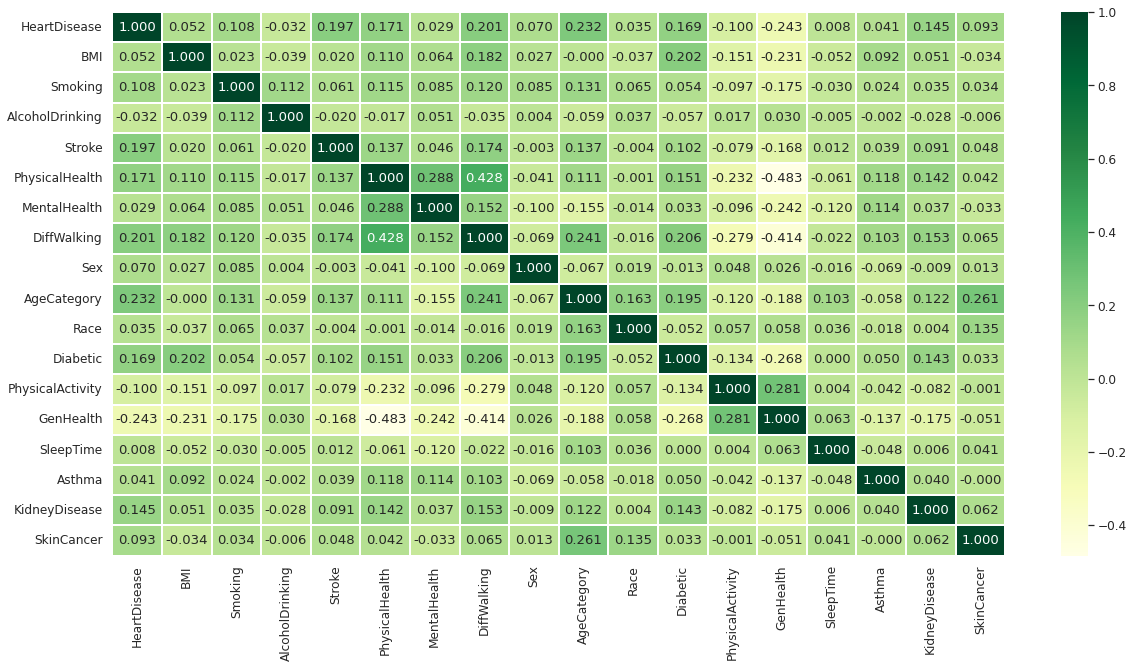

In [16]:
# Correlation heatmap between variables:

plt.figure(figsize = (20, 10)) 
sns.set(font_scale=1.1)

sns.heatmap(heart_df.corr(), annot = True, fmt='.3f',
            cmap='YlGn',
            linewidths=1,
            cbar=True) 


plt.show()

> Remove the feature/variables with the lowest correlation to target

## 3. Data Preprocessing

In [16]:
# split dataset into x,y
x = heart_df.drop(columns=['HeartDisease','MentalHealth','SleepTime','Race'],axis=1)
y = heart_df['HeartDisease']
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,0,0,57.0,2,1,3,1,0,1
1,20.34,0,0,1,0.0,0,0,80.0,0,1,3,0,0,0
2,26.58,1,0,0,20.0,0,1,67.0,2,1,1,1,0,0
3,24.21,0,0,0,0.0,0,0,77.0,0,0,2,0,0,1
4,23.71,0,0,0,28.0,1,0,42.0,0,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,1,1,62.0,2,0,1,1,0,0
319791,29.84,1,0,0,0.0,0,1,37.0,0,1,3,1,0,0
319792,24.24,0,0,0,0.0,0,0,47.0,0,1,2,0,0,0
319793,32.81,0,0,0,0.0,0,0,27.0,0,0,2,0,0,0


In [17]:
# train_test split using Ncr technique 50% on resampling data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
#Scale the feature for Train-Test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# define model
lg2 = LogisticRegression(random_state=42)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
train_pred = lg2.predict(X_train)
y_pred_proba = lg2.predict_proba(X_test)
y_pred_pos_proba = y_pred_proba[:, 1]

# performance
print(f'Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_pos_proba)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Accuracy Score: 0.9162236745415031
Accuracy Score: 0.9135852655607498
Confusion Matrix: 
[[57866   501]
 [ 5026   566]]
Area Under Curve: 0.8355583474655817
Recall score: 0.10121602288984263
Clasification Report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959



> To reach a good resampling result, do the resampling with NeighbourhoodCleaningRule 2 times with the first time using threshold_cleaning=0.5, the second time using threshold_cleaning=0.2 , the data should reach 118495 rows.

In [18]:

from imblearn.under_sampling import NeighbourhoodCleaningRule 

print(f'Before Counter:\n {y.value_counts()}')
# Using NeighbourhoodCleaningRule (ncr)

ncr = NeighbourhoodCleaningRule(n_neighbors=20, threshold_cleaning=0.5)
X_ncr, y_ncr =ncr.fit_resample(x,y)


print(f'After Counter: {y_ncr.value_counts()}')



Before Counter:
 0    292422
1     27373
Name: HeartDisease, dtype: int64
After Counter: 0    144089
1     27373
Name: HeartDisease, dtype: int64


In [19]:

from imblearn.under_sampling import NeighbourhoodCleaningRule 

print(f'Before Counter:\n {y_ncr.value_counts()}')
# Using NeighbourhoodCleaningRule (ncr)

ncr = NeighbourhoodCleaningRule(n_neighbors=20, threshold_cleaning=0.5)
X_ncr, y_ncr =ncr.fit_resample(X_ncr,y_ncr)


print(f'After Counter: {y_ncr.value_counts()}')



Before Counter:
 0    144089
1     27373
Name: HeartDisease, dtype: int64
After Counter: 0    90913
1    27373
Name: HeartDisease, dtype: int64


> I already save the data from doing to resampling twice, so i'm going to just use it rather than resampling it again. I named the data as rfc_removedD_feature_ncr.csv

In [ ]:
# save the dataset that have been resampled into a csv file, so i can use it again without resampling it again, because to resample this lot of data really need a lot of time
X_ncr.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_PenyakitJantung/data/new_rfc_removed_feature_ncr.csv',index=False) # Use Tab to seperate data

In [22]:
rfc_feature_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_PenyakitJantung/data/rfc_removed_feature_ncr.csv')
rfc_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_PenyakitJantung/data/rfc_removed_label_ncr.csv')

rfc_feature_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,28.87,1,0,0,6.0,1,0,77.0,0,0,1,0,0,0
1,34.30,1,0,0,30.0,1,1,62.0,2,0,0,1,0,0
2,29.18,0,0,0,1.0,0,0,52.0,0,1,3,0,0,0
3,26.17,1,0,0,0.0,0,0,47.0,0,1,3,0,0,0
4,32.98,1,0,1,10.0,1,1,77.0,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,23.38,0,0,0,0.0,0,0,62.0,0,1,4,0,0,0
118491,22.22,0,0,0,0.0,0,0,21.0,0,1,4,0,0,0
118492,27.41,1,0,0,7.0,1,1,62.0,2,0,1,1,0,0
118493,29.84,1,0,0,0.0,0,1,37.0,0,1,3,1,0,0


In [ ]:
# Or i can use this new one
new_rfc_feature_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_PenyakitJantung/data/new_rfc_removed_feature_ncr.csv')
new_rfc_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_PenyakitJantung/data/new_rfc_removed_label_ncr.csv')

In [23]:
# Combine label column with rfc feature columns 
after_resampling_df = rfc_feature_df.assign(HeartDisease= rfc_label_df)
after_resampling_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,28.87,1,0,0,6.0,1,0,77.0,0,0,1,0,0,0,1
1,34.30,1,0,0,30.0,1,1,62.0,2,0,0,1,0,0,1
2,29.18,0,0,0,1.0,0,0,52.0,0,1,3,0,0,0,0
3,26.17,1,0,0,0.0,0,0,47.0,0,1,3,0,0,0,0
4,32.98,1,0,1,10.0,1,1,77.0,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,23.38,0,0,0,0.0,0,0,62.0,0,1,4,0,0,0,0
118491,22.22,0,0,0,0.0,0,0,21.0,0,1,4,0,0,0,0
118492,27.41,1,0,0,7.0,1,1,62.0,2,0,1,1,0,0,1
118493,29.84,1,0,0,0.0,0,1,37.0,0,1,3,1,0,0,0


### Removing Outliers


In [24]:
fig = px.box(after_resampling_df['BMI'], y="BMI")
fig.show()

In [ ]:
# The change outlier values in BMI to median values (26.63)
after_resampling_df.loc[(after_resampling_df.BMI > 40.79), 'BMI'] = 26.57

after_resampling_df.loc[(after_resampling_df.BMI < 12.91), 'BMI'] = 26.57



In [ ]:
fig = px.box(after_resampling_df['BMI'], y="BMI")
fig.show()

### Train-Test split

In [ ]:
x = after_resampling_df.drop(columns=['HeartDisease'],axis=1)
y = after_resampling_df['HeartDisease']

In [ ]:
# train_test split using Ncr technique 50% on resampling data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
np.random.seed(42)

# Split into train and valid set
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train ,#independent variable
                                                   y_train ,#dependent variable
                                                   test_size=0.2)

### Normalization

In [ ]:
#Scale the feature for Train-Test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#Scale the feature for Train-Validation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_new)
X_test = sc.transform(X_val)

### Hyperparameter Tuning

> Using GridSearch to search the best parameter for RandomForestClassifier

In [ ]:
# Setup Random Seed
np.random.seed(42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
gs_rfc = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
gs_rfc.fit(X_train_new,y_train_new)

In [ ]:
gs_rfc.best_params_

> Using GridSearch to search the best parameter for LogisticRegression

In [ ]:
# Tuning and evaluate model using only 10k datapoints.
X_train = X_train[:][:10000]
y_train = y_train[:][:10000]
y_train.shape

In [ ]:
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','sag'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Setup Random Seed
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
gs_log_reg.fit(X_train,y_train)

gs_log_reg.best_estimator_


> ### Evaluate Model


In [ ]:
# define model
rfc = RandomForestClassifier(random_state=42, bootstrap=True, max_depth=15, max_features=3,
                             min_samples_leaf=3,min_samples_split=5,n_estimators=100)
# fit it
rfc.fit(X_train,y_train.values.ravel())
# test
y_pred = rfc.predict(X_test)
train_pred = rfc.predict(X_train)

# performance
print(f'Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Accuracy Score: 0.975282157500951
Accuracy Score: 0.9704962380590075
Confusion Matrix: 
[[18078   166]
 [  532  4882]]
Area Under Curve: 0.9463186787776126
Recall score: 0.9017362393793867
Clasification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18244
           1       0.97      0.90      0.93      5414

    accuracy                           0.97     23658
   macro avg       0.97      0.95      0.96     23658
weighted avg       0.97      0.97      0.97     23658



In [ ]:
# define model
lg2 = LogisticRegression(random_state=42, class_weight={0:0.3, 1:0.7},C=3792.690190732246)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
train_pred = lg2.predict(X_train)

# performance
print(f'Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Accuracy Score: 0.9578137549139789
Accuracy Score: 0.9569278890861442
Confusion Matrix: 
[[17647   597]
 [  422  4992]]
Area Under Curve: 0.9446654236011179
Recall score: 0.9220539342445512
Clasification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18244
           1       0.89      0.92      0.91      5414

    accuracy                           0.96     23658
   macro avg       0.93      0.94      0.94     23658
weighted avg       0.96      0.96      0.96     23658



## Save the Model

> ### Test the model without removing outliers, dropping features(feature selection) and not doing any resampling